In [1]:
!pip install pymongo

     |████████████████████████████████| 506 kB 23.4 MB/s eta 0:00:01
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [2]:
!pip install pymongo[srv]

     |████████████████████████████████| 241 kB 22.4 MB/s eta 0:00:01
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [3]:
!pip install dnspython

You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [3]:
!pip install tweepy

     |████████████████████████████████| 64 kB 4.4 MB/s  eta 0:00:01
     |████████████████████████████████| 146 kB 21.3 MB/s eta 0:00:01
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [4]:
!pip install twitter

     |████████████████████████████████| 50 kB 7.2 MB/s  eta 0:00:01
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [5]:
import pymongo
from pymongo import MongoClient
import json
import tweepy
import twitter
from pprint import pprint
import configparser
import pandas as pd

In [6]:
config = configparser.ConfigParser()
config.read('config.ini')

CONSUMER_KEY      = config['mytwitter']['api_key']
CONSUMER_SECRET   = config['mytwitter']['api_secrete']
OAUTH_TOKEN       = config['mytwitter']['access_token']
OATH_TOKEN_SECRET = config['mytwitter']['access_secrete']

mongod_connect = config['mymongo']['connection']

In [7]:
client = MongoClient(mongod_connect)
db = client.lab9 # use or create a database named demo
tweet_collection = db.tweet_collection #use or create a collection named tweet_collection
tweet_collection.create_index([("id", pymongo.ASCENDING)],unique = True) # make sure the collected tweets are unique

'id_1'

In [8]:
rest_auth = twitter.oauth.OAuth(OAUTH_TOKEN,OATH_TOKEN_SECRET,CONSUMER_KEY,CONSUMER_SECRET)
rest_api = twitter.Twitter(auth=rest_auth)

In [9]:
count = 100 #number of returned tweets, default and max is 100
#geocode = "38.4392897,-78.9412224,50mi"  # defin the location, in Harrisonburg, VA
q = "covid19"         #define keywords

In [10]:
search_results = rest_api.search.tweets( count=count,q=q) #you can use both q and geocode
statuses = search_results["statuses"]
since_id_new = statuses[-1]['id']
for statuse in statuses:
    try:
        tweet_collection.insert_one(statuse)
        pprint(statuse['created_at'])# print the date of the collected tweets
    except:
        pass

'Thu Nov 04 19:01:37 +0000 2021'
'Thu Nov 04 19:01:36 +0000 2021'
'Thu Nov 04 19:01:36 +0000 2021'
'Thu Nov 04 19:01:34 +0000 2021'
'Thu Nov 04 19:01:34 +0000 2021'
'Thu Nov 04 19:01:34 +0000 2021'
'Thu Nov 04 19:01:33 +0000 2021'
'Thu Nov 04 19:01:33 +0000 2021'
'Thu Nov 04 19:01:32 +0000 2021'
'Thu Nov 04 19:01:32 +0000 2021'
'Thu Nov 04 19:01:31 +0000 2021'
'Thu Nov 04 19:01:31 +0000 2021'
'Thu Nov 04 19:01:31 +0000 2021'
'Thu Nov 04 19:01:30 +0000 2021'
'Thu Nov 04 19:01:28 +0000 2021'
'Thu Nov 04 19:01:28 +0000 2021'
'Thu Nov 04 19:01:28 +0000 2021'
'Thu Nov 04 19:01:27 +0000 2021'
'Thu Nov 04 19:01:27 +0000 2021'
'Thu Nov 04 19:01:27 +0000 2021'
'Thu Nov 04 19:01:26 +0000 2021'
'Thu Nov 04 19:01:26 +0000 2021'
'Thu Nov 04 19:01:25 +0000 2021'
'Thu Nov 04 19:01:25 +0000 2021'
'Thu Nov 04 19:01:24 +0000 2021'
'Thu Nov 04 19:01:24 +0000 2021'
'Thu Nov 04 19:01:24 +0000 2021'
'Thu Nov 04 19:01:23 +0000 2021'
'Thu Nov 04 19:01:23 +0000 2021'
'Thu Nov 04 19:01:23 +0000 2021'
'Thu Nov 0

In [14]:
since_id_old = 0
while(since_id_new != since_id_old):
    since_id_old = since_id_new
    search_results = rest_api.search.tweets( count=count,q=q,
                         max_id= since_id_new)
    statuses = search_results["statuses"]
    since_id_new = statuses[-1]['id']
    for statuse in statuses:
        try:
            tweet_collection.insert_one(statuse)
            pprint(statuse['created_at']) # print the date of the collected tweets
        except:
            pass

'Thu Nov 04 18:23:35 +0000 2021'
'Thu Nov 04 18:23:34 +0000 2021'
'Thu Nov 04 18:23:34 +0000 2021'
'Thu Nov 04 18:23:33 +0000 2021'
'Thu Nov 04 18:23:33 +0000 2021'
'Thu Nov 04 18:23:31 +0000 2021'
'Thu Nov 04 18:23:30 +0000 2021'
'Thu Nov 04 18:23:30 +0000 2021'
'Thu Nov 04 18:23:30 +0000 2021'
'Thu Nov 04 18:23:29 +0000 2021'
'Thu Nov 04 18:23:28 +0000 2021'
'Thu Nov 04 18:23:27 +0000 2021'
'Thu Nov 04 18:23:27 +0000 2021'
'Thu Nov 04 18:23:26 +0000 2021'
'Thu Nov 04 18:23:26 +0000 2021'
'Thu Nov 04 18:23:26 +0000 2021'
'Thu Nov 04 18:23:26 +0000 2021'
'Thu Nov 04 18:23:25 +0000 2021'
'Thu Nov 04 18:23:25 +0000 2021'
'Thu Nov 04 18:23:25 +0000 2021'
'Thu Nov 04 18:23:25 +0000 2021'
'Thu Nov 04 18:23:25 +0000 2021'
'Thu Nov 04 18:23:25 +0000 2021'
'Thu Nov 04 18:23:25 +0000 2021'
'Thu Nov 04 18:23:24 +0000 2021'
'Thu Nov 04 18:23:24 +0000 2021'
'Thu Nov 04 18:23:24 +0000 2021'
'Thu Nov 04 18:23:23 +0000 2021'
'Thu Nov 04 18:23:20 +0000 2021'
'Thu Nov 04 18:23:19 +0000 2021'
'Thu Nov 0

KeyboardInterrupt: 

In [15]:
print(tweet_collection.estimated_document_count())# number of tweets collected

user_cursor = tweet_collection.distinct("user.id")
print (len(user_cursor)) # number of unique Twitter users

4852
4151


In [16]:
tweet_collection.create_index([("text", pymongo.TEXT)], name='text_index', default_language='english') # create a text index

'text_index'

In [17]:

tweet_cursor = tweet_collection.find({"$text": {"$search": "covid"}}) # return tweets contain vote

In [18]:
for document in tweet_cursor[0:10]: # display the first 10 tweets from the query
    try:
        print ('----')
#         pprint (document) # use pprint to print the entire tweet document
   
        print ('name:', document["user"]["name"]) # user name
        print ('text:', document["text"])         # tweets
    except:
        print ("***error in encoding")
        pass

----
name: Covid-19 Ö-Watch
text: 🇦🇹 Ärztekammer: Kassensystem nicht auf Long Covid vorbereitet https://t.co/u86IqL0xYq #covid #corona #covid19
----
name: CBS 58 News
text: RT @DHSWI: Here is today's snapshot of COVID-19 in Wisconsin. Your best defense against the virus is the COVID-19 vaccine. Vaccines are ava…
----
name: Mrs.H. 💙 #MaskUp 😷
text: RT @DHSWI: Here is today's snapshot of COVID-19 in Wisconsin. Your best defense against the virus is the COVID-19 vaccine. Vaccines are ava…
----
name: Dr. Rachel Roper
text: We will have as much COVID as measles as soon as everyone gets vaccinated for COVID as much as they have gotten vac… https://t.co/BPTlZ4VMRR
----
name: WIDeptHealthServices
text: Here is today's snapshot of COVID-19 in Wisconsin. Your best defense against the virus is the COVID-19 vaccine. Vac… https://t.co/PgDWIHqFlw
----
name: #StayHome
text: RT @njoyflyfishing: Daily US Covid Deaths by County For IN   2021-11-02:  Updated Covid insights from our data scientists and US

In [20]:
tweet_cursor = tweet_collection.find({"$text": {"$search": "vote"}}) # return tweets contain vote

In [21]:

tweet_df = pd.DataFrame(list(tweet_cursor ))
tweet_df[:10] #display the first 10 tweets

,_id,created_at,id,id_str,text,truncated,entities,metadata,source,in_reply_to_status_id,...,is_quote_status,retweet_count,favorite_count,favorited,retweeted,possibly_sensitive,lang,retweeted_status,quoted_status_id,quoted_status_id_str
0,618431453a1d7dfafb834532,Thu Nov 04 18:31:37 +0000 2021,1456328294174019584,1456328294174019584,"Poor health threatens voting in older age, but...",True,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,...,False,0,0,False,False,False,en,NaN,NaN,NaN
1,618431593a1d7dfafb83491d,Thu Nov 04 18:24:04 +0000 2021,1456326395089588233,1456326395089588233,@seanhannity why isn't the GoP pushing for Con...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",NaN,...,False,0,0,False,False,NaN,en,NaN,NaN,NaN
2,618431573a1d7dfafb8348de,Thu Nov 04 18:24:33 +0000 2021,1456326516145459212,1456326516145459212,"RT @tomleykis: Gee, sorry to hear that! One le...",False,"{'hashtags': [{'text': 'Trumptards', 'indices'...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,True,153,0,False,False,NaN,en,{'created_at': 'Thu Aug 26 01:58:46 +0000 2021...,1.430710e+18,1430710191461474307
3,6184313d3a1d7dfafb8343c6,Thu Nov 04 18:34:57 +0000 2021,1456329132544086020,1456329132544086020,RT @achernandez909: @POTUS @WhiteHouse I voted...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,3,0,False,False,NaN,en,{'created_at': 'Thu Nov 04 14:29:57 +0000 2021...,NaN,NaN
4,6184311b3a1d7dfafb833d21,Thu Nov 04 18:49:01 +0000 2021,1456332673287327751,1456332673287327751,RT @gnickodonnell: All those Tories who voted ...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,2,0,False,False,NaN,en,{'created_at': 'Thu Nov 04 17:21:05 +0000 2021...,NaN,NaN
5,6184311b3a1d7dfafb833d1f,Thu Nov 04 18:49:02 +0000 2021,1456332679432056845,1456332679432056845,RT @gnickodonnell: All those Tories who voted ...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://naattuvartha.byethost33.com"" r...",NaN,...,False,2,0,False,False,NaN,en,{'created_at': 'Thu Nov 04 17:21:05 +0000 2021...,NaN,NaN
6,618430ff3a1d7dfafb8337f7,Thu Nov 04 19:00:04 +0000 2021,1456335454463270913,1456335454463270913,@ryanmeili @AleanaYoung Moe only takes action ...,True,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",1.456325e+18,...,False,0,0,False,False,NaN,en,NaN,NaN,NaN
7,6184313c3a1d7dfafb83436b,Thu Nov 04 18:35:38 +0000 2021,1456329307173834754,1456329307173834754,RT @Callystor: Le vote de la honte.\nQuand de ...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'fr', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",NaN,...,False,12,0,False,False,NaN,fr,{'created_at': 'Thu Nov 04 09:45:12 +0000 2021...,NaN,NaN


<AxesSubplot:>

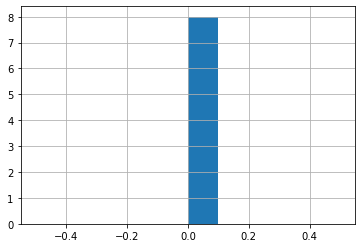

In [22]:
tweet_df["favorite_count"].hist() # create a histogram show the favorite count